# Electrostatics computational project (DEF-D opdracht 1)

At  the end of this project, you should be able to design a rain gauge that operates on the principle of an electric capacitor. Such a capacitive precipitation (rain) gauge is useful for detecting and measuring rainfall by sensing changes in capacitance caused by water accumulation.

This project has 5 parts:
1) A single point charge in vacuum at the origin
2) Uniformly charged non-conducting disk in vacuum created with many point charges
3) One conducting disk in vacuum hold at constant electric potential
4) Two conducting disks in vacuum hold at constant electric potential V1 and -V1
5) Design of a capacitive rain gauge

Instructions:
- Create a local folder named *figures*, where you will place images generated during the project.
- The questions you must answer are noted Qi.j
- This notebook calls functions from the file *functions_electrostatics.py*, DO NOT MODIFY THIS FILE

You will study problems with axisymmetry, and therefore we will use cylindrical coordinates (r,$\phi$,z). r is the radius and z is the height. Because of axisymmetry, $\phi$ will not play any role here.

For each configuration, the electric potential will be calculated first. Then, the electric field will be computed with a simple centered finite-difference numerical scheme.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions_electrostatics import *
#from IPython import display
from IPython.display import Image, display


epsilon0 = 8.854e-12  # Permittivity of free space (F/m)

"""============================================================================================
We first define the size of the domain of calculation and spatial discretization of the domain
"""

# grid of computation domain, the field is calculated in the (r,z) plane (axisymmetry):
width_domain = 5 # (m)
height_domain = width_domain # max distance from disk surface, above and below (m)
grid_step = 0.1 # grid step size (m)

### 1) A single point charge in vacuum at the origin

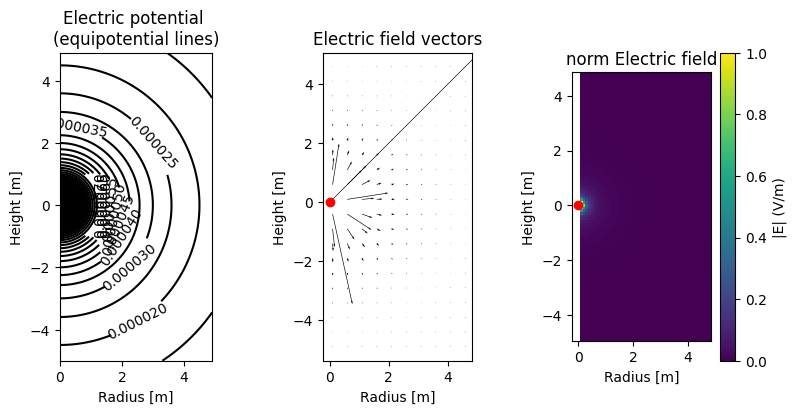

In [2]:

charge_one_point = 1e-14 # charge of one single point (C)
r, z, B = initialize_plane_grid_for_pt_charge_at_origin(height_domain,width_domain,grid_step)    
V = calculate_V_point_charge_at_origin(charge_one_point,r,z)
Er, Ez, normE = compute_E_pt_charge(V,B,grid_step) # using centered finite-difference method
r_for_E = r[1:-1] # centered finite-difference method cannot calculate E at very first and very last grid point in r dimension
z_for_E = z[1:-1] # centered finite-difference method cannot calculate E at very first and very last grid point in z dimension
plot_results_pt_charge_at_origin(Ez,Er,normE,V,r,z,grid_step)


Q1.1) Question for students:
- Show that the electric potential decreases as 1/r
- Show that the electric field decreases as 1/$r^2$

(hint: use a log-log data transformation and linear regression)

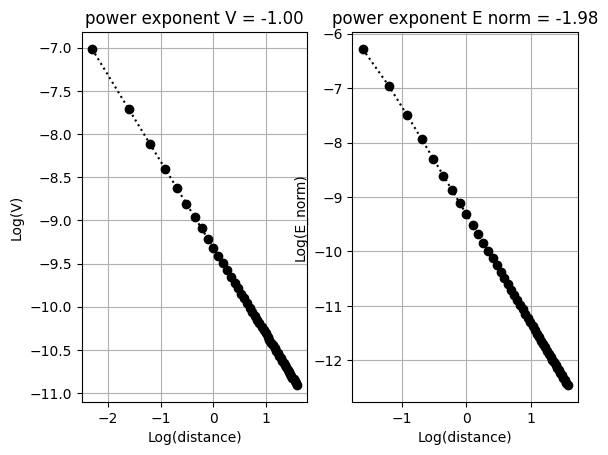

In [3]:
"""================================
Answer model for Q1.1:
"""

idx_z_zero = np.where(abs(z) < 1e-10)[0]
# discard grid point where point charge is (r=0):
V_for_fit = np.squeeze(V[idx_z_zero, 1:])
r_for_fit = r[1:]
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(np.log(r_for_fit), np.log(V_for_fit), ':ko')
p = np.polyfit(np.log(r_for_fit), np.log(V_for_fit), 1)
plt.ylabel("Log(V)")
plt.xlabel("Log(distance)")
plt.grid(True)
plt.title('power exponent V = %1.2f' %p[0])

# discard grid point where point charge is,
# and one grid point at beginning and end because E not accurately calculated (gradient calculated with centered finite difference)
normE_for_fit = np.squeeze(normE[idx_z_zero, 1:])
r_for_fit = r_for_E[1:]
plt.subplot(1, 2, 2)
plt.plot(np.log(r_for_fit), np.log(normE_for_fit), ':ko')
p = np.polyfit(np.log(r_for_fit), np.log(normE_for_fit), 1)
plt.ylabel("Log(E_norm)")
plt.xlabel("Log(distance)")
plt.grid(True)
plt.title('power exponent E norm = %1.2f' %p[0])
plt.show()

### 2) Uniformly charged non-conducting disk in vacuum created with many point charges

A uniformly charged disk is constructed by positionning a large number of point charges on a regular grid inside the disk area (principle of superposition).

The z-axis is the axis of the disk.
The radius of the disk $R$ can be set below:

In [4]:
disk_radius = 3 # (m)


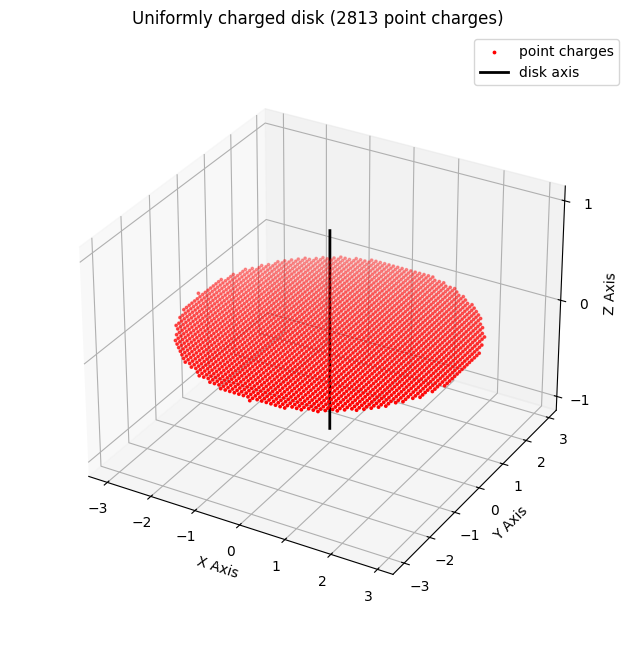

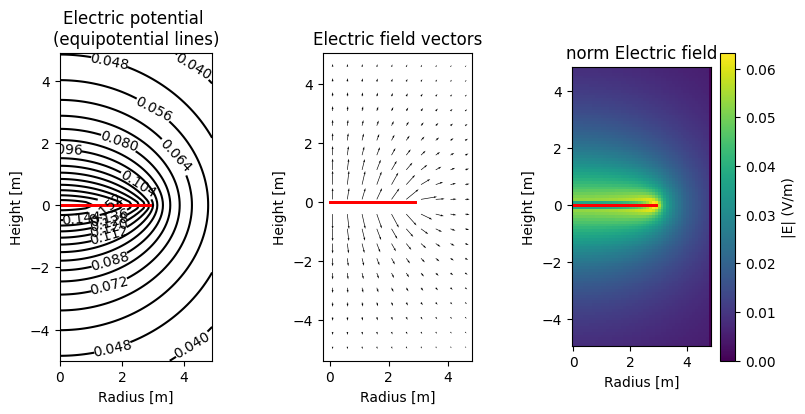

In [5]:
r, z, B = initialize_plane_grid_for_uniformly_charged_disk(height_domain,width_domain,grid_step)
idx_z_zero = np.where(abs(z) < 1e-10)[0]
z_coord_DISK = 0 # (m) position of the disk on the z-axis
inter_charge_distance = grid_step # (m) distance between point charges
V, number_point_charges_on_disk = calculate_V_disk_at_origin_uniform_surface_charge_density(z_coord_DISK,charge_one_point,disk_radius,inter_charge_distance,r,z)
Er, Ez, normE = compute_E_disk(V,B,grid_step) # using centered finite-difference method
r_for_E = r[1:-1] # centered finite-difference method cannot calculate E at very first and very last grid point in r dimension
z_for_E = z[1:-1] # centered finite-difference method cannot calculate E at very first and very last grid point in z dimension
plot_results_disk(Ez,Er,normE,V,r,z,grid_step,disk_radius,z_coord_DISK,z_coord_DISK)

Q.2.1) Question for students:

The number of point charges used to create the uniformly charged disk is number_point_charges_on_disk,
the charge of one single point charge is charge_one_point.
- Calculate the surface charge density of the disk
- Give the physical unit of the surface charge density

In [6]:
"""================================
Answer model for Q2.1
"""

# Surface charge density (C/m^2):
surface_charge_density = number_point_charges_on_disk * charge_one_point / (np.pi*disk_radius**2) # Surface charge density (C/m^2)

Q.2.2) Question for students:

The surface charge density on the disk is noted $\sigma$.
- Plot the electric potential along the radius of the disk (z=0).
- Verify that the electric potential at the rim of the disk equals $V = \sigma R/(\pi \epsilon_0)$
(see Problem 2.51 in Griffiths' textbook)
- Verify that the electric potential at the center of the disk equals $V = \sigma R/(2 \epsilon_0)$

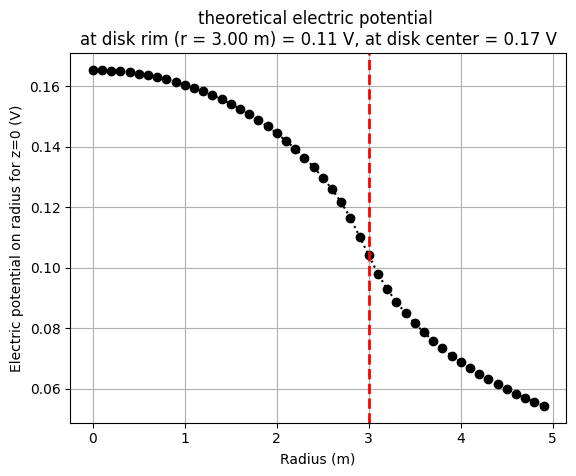

In [7]:
"""================================
Answer model for Q2.2
"""

V_rim_disk = surface_charge_density*disk_radius/(np.pi*epsilon0)
V_center_disk = surface_charge_density*disk_radius/(2*epsilon0)

V_on_radius = np.squeeze(V[idx_z_zero, :])
plt.figure()
plt.plot(r, V_on_radius, ':ko')
plt.axvline(disk_radius, color='r', linewidth=2 , linestyle='--')
plt.ylabel("Electric potential on radius for z=0 (V)")
plt.xlabel("Radius (m)")
plt.grid(True)
plt.title('theoretical electric potential \nat disk rim (r = %1.2f m)' %disk_radius + ' = %1.2f'  %V_rim_disk + ' V, at disk center = %1.2f' %V_center_disk + ' V')
plt.show()

Q.2.3) Question for students:
- Plot the computed electric potential on the axis of the disk (r=0)

The theoretical electric potential on the axis of the very large disk, *i.e. if $R>>z$* is (see Problem 2.26c in Griffiths 5th edition): $V(z,r=0)=\frac{\sigma}{2\epsilon_0}\big( R - |z|\big)$
- Plot the theoretical electric potential on the axis of a very large disk with surface charge density $\sigma$
- Plot the z-component of the electric field on the axis of the disk (r=0)
- Plot the theoretical electric field for an infinite charged surface $|E| = \sigma/(2 \epsilon_0)$
(see Example 2.5 in Griffith)
- Where (in space) does the electric field of the uniformly charged disk approach the electric field of an infinite charged surface?

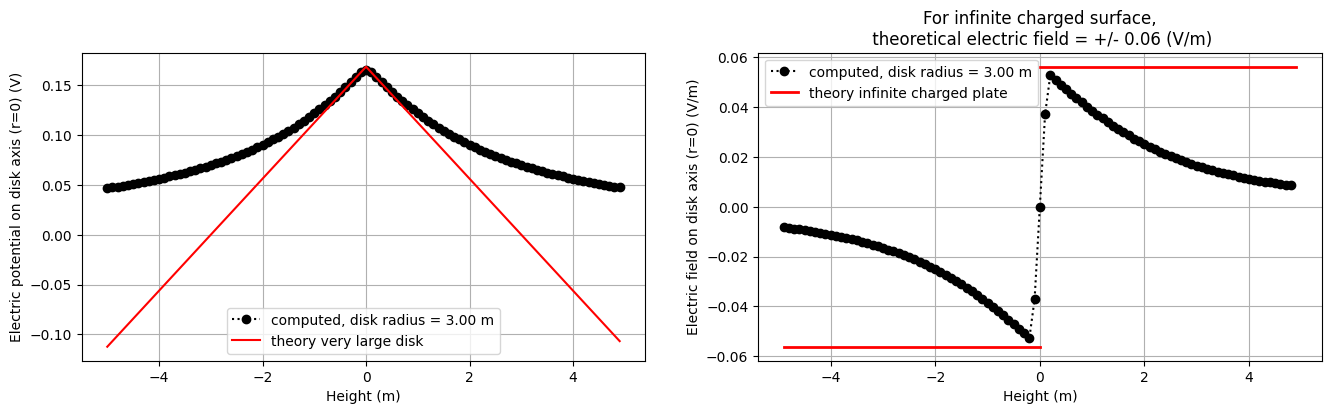

In [8]:
"""================================
Answer model for Q2.3
"""

# Theoretical electric potential for R>>z:
V_very_large_disk_on_axis = surface_charge_density * (disk_radius - np.abs(z)) / (2 * epsilon0)

# Theoretical electric field magnitude for an infinite charged plate:
E_infinite_charged_plate = surface_charge_density / (2 * epsilon0)

Ez_on_axis = np.squeeze(Ez[:, 0])
V_on_axis = np.squeeze(V[:, 0])

plt.figure(figsize=(16,4)) # Width, height in inches.
plt.subplot(1, 2, 1)
plt.plot(z, V_on_axis, ':ko')
plt.plot(z, V_very_large_disk_on_axis, 'r')
plt.legend(['computed, disk radius = %1.2f' %disk_radius + ' m','theory very large disk'])
plt.ylabel("Electric potential on disk axis (r=0) (V)")
plt.xlabel("Height (m)")
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(z_for_E, Ez_on_axis, ':ko')
plt.plot([z[1], z[idx_z_zero[0]]], [-E_infinite_charged_plate, -E_infinite_charged_plate],  color='r', linewidth=2)
plt.legend(['computed, disk radius = %1.2f' %disk_radius + ' m','theory infinite charged plate'])
plt.plot([z[idx_z_zero[0]], z[-1]], [E_infinite_charged_plate, E_infinite_charged_plate],  color='r', linewidth=2)
plt.ylabel("Electric field on disk axis (r=0) (V/m)")
plt.xlabel("Height (m)")
plt.grid(True)
plt.title('For infinite charged surface,\n theoretical electric field = +/- %1.2f'  %E_infinite_charged_plate + ' (V/m)')
plt.show()

# The electric field of the uniformly charged disk is nearly equal to the electric field of an infinite charged surface very near the center of the disk (r=0 and z~0)


Q.2.4) Question for students:

The electric field a distance z above the center of a flat circular disk of radius R with uniform surface charge density $\sigma$ is given by (see Problem 2.6 in Griffiths' textbook):
$$ \mathbf{E} = \frac{\sigma}{2\epsilon_0} \bigg[ 1- \frac{z}{\sqrt{R^2 + z^2}}\bigg] \hat{\mathbf{z}}$$
(the z-axis is the disk axis)

- Insert below the figure generated in the previous question for two values of the disk radius using the command display(Image("folder-name/image-name")). What happens to the z-component of the electric field at a given height z on the axis of the disk if only the radius of the disk is increased?
- What must be the height z on the disk axis to have the electric field created by the disk equal to 10% of the electric field created by an infinite charged plane? Express this height in terms of the disk radius R

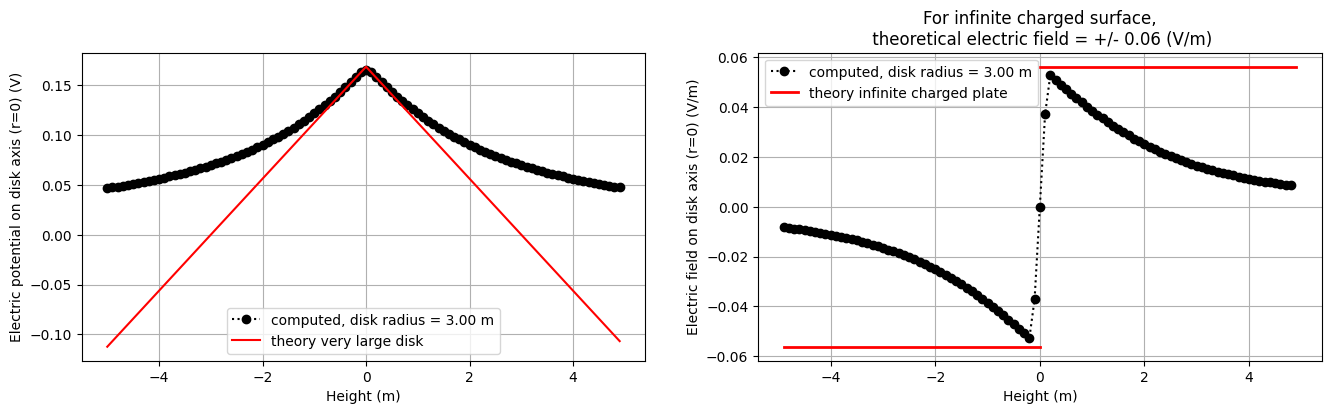

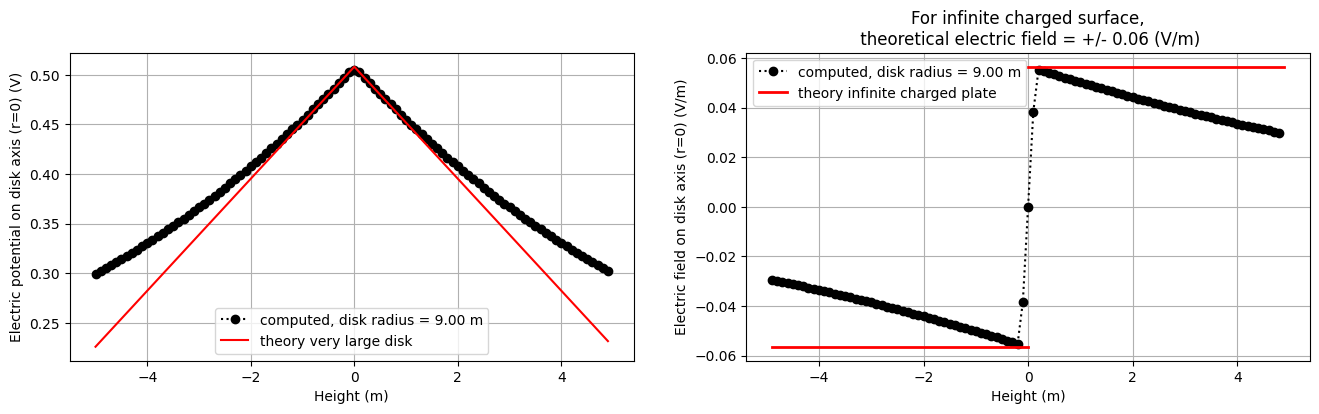

In [9]:
"""================================
Answer model for Q2.4
"""

display(Image("figures/3m_radius.png"))
display(Image("figures/9m_radius.png"))

# If the disk radius is increased, the electric field on the disk axis at a given height increases.

# Using the formula, we find that the electric field created by the disk equal to 10% of the electric field created by an infinite charged plane if z = R*0.1/sqrt(1-0.1^2) ~ R*0.1,
# thus z approximately equal to 10% of the disk radius


### 3) One conducting disk in vacuum hold at constant electric potential

We will now study the differences between a uniformly charged disk (made of a non-conducting material) and a conducting disk hold at a given electric potential.

A numerical solver of the Laplace equation for an axisymmetrical configuration is used.

In [ ]:
V0 = 0 # electric potential at boundary of domain (V)

# one disk
z_pos_disk1 = 0 # z-coordinate of first conducting disk (m)
z_pos_disk2 = z_pos_disk1 # z-coordinate of second conducting disk (m)
V1 = 10 # electric potential of first conducting disk (V)
r, z, r_repmat, V, B, idx_R, idx_z1, idx_z2 = initialize_variables_Laplace(width_domain,disk_radius,height_domain,grid_step,z_pos_disk1,z_pos_disk2,V0,V1,V1)

"""--------------------------------------------------------------------
Field calculation for conducting disk
"""
solve_Laplace_equation(V,B,r_repmat,grid_step,idx_z1,idx_z2,idx_R,V1,V1,1e-3)
Er, Ez, normE = compute_E_disk(V,B,grid_step)
r_for_E = r[1:-1] # centered finite-difference method cannot calculate E at very first and very last grid point in r dimension
z_for_E = z[1:-1] # centered finite-difference method cannot calculate E at very first and very last grid point in z dimension

""""---------------------------------------------------------
Display calculated field
"""
plot_results_disk(Ez,Er,normE,V,r,z,grid_step,disk_radius,z_pos_disk1,z_pos_disk2)

Q.3.1) Question for students:
- Plot the electric field strength on the axis of the disk (r=0)
- What is the magnitude of the electric field on the axis near the center of the disk?
- How can you estimate the surface charge density at the surface of the disk at its center (r=0, z=0)?

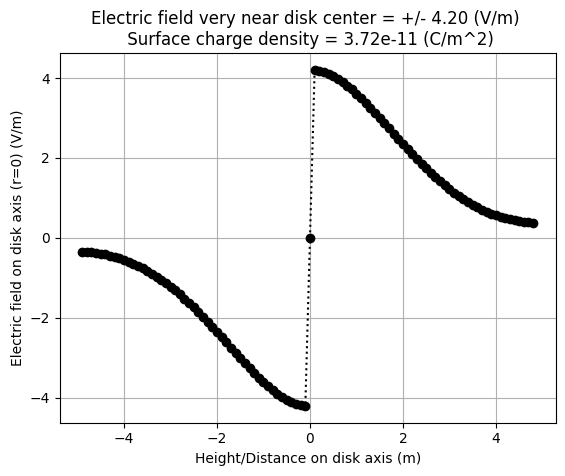

In [ ]:
"""================================
Answer model for Q3.1
"""

Ez_on_axis = np.squeeze(Ez[:, 0])
Ez_near_disk_on_axis = max(Ez_on_axis)

# at the surface of a conductor, we have: Ez = sigma/epsilon
surface_charge_density_center = epsilon0 * Ez_near_disk_on_axis

plt.figure()
plt.plot(z_for_E, Ez_on_axis, ':ko')
plt.ylabel("Electric field on disk axis (r=0) (V/m)")
plt.xlabel("Height/Distance on disk axis (m)")
plt.title('Electric field very near disk center = +/- %1.2f'  %Ez_near_disk_on_axis + ' (V/m) \n Surface charge density = %1.2e' %surface_charge_density_center + ' (C/m^2)')
plt.grid(True)
plt.show()


Q.3.2) Question for students:

The surface charge density $\sigma(r)$ on a conducting disk with radius $R$ is not uniform on the disk surface (Problems 2.58 and 2.63 Griffiths 5th edition):
$$\sigma(r) = \frac{Q}{2 \pi R \sqrt{R^2 - r^2}}$$
- Estimate the total charge Q on the surface of the conducting disk using the result of question Q3.1
- Compare the surface charge density at the center of the conducting disk to that of a uniformly charged disk with the same total charge
- Plot the surface charge density on the conducting disk and on a uniformly charged disk (with same total charge Q) as a function of the radius for $0\le r <R$.


Total charge Q on the surface of the conducting disk = 2.10e-09 C


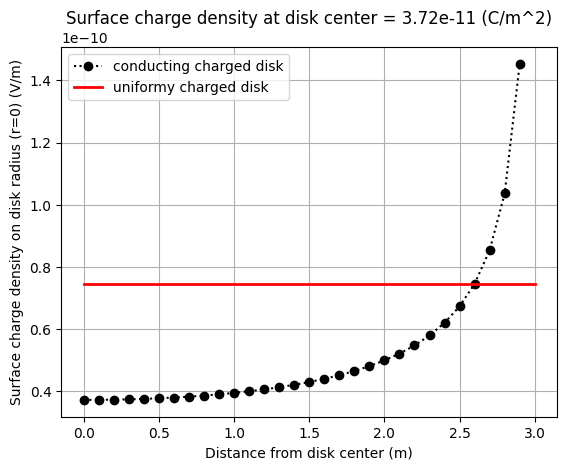

In [ ]:
"""================================
Answer model for Q3.2
"""

# at r=0, we have:
Q = surface_charge_density_center*(2*np.pi*disk_radius**2)
print('Total charge Q on the surface of the conducting disk = %1.2e' %Q + ' C')

# answer: the surface charge density at the center of the conducting disk is half as great as that of a uniformly charged disk with the same total charge

sigma = Q/(2*np.pi*disk_radius*np.sqrt(disk_radius**2-r[:idx_R]**2)) 

plt.figure()
plt.plot(r[:idx_R], sigma, ':ko')
plt.plot([0, r[idx_R]], [Q/(np.pi*disk_radius**2),Q/(np.pi*disk_radius**2)], 'r', linewidth=2)
#plt.axhline(Q/(np.pi*disk_radius**2), color='r', linewidth=2)
plt.legend(['conducting charged disk','uniformy charged disk'])
plt.ylabel("Surface charge density on disk radius (r=0) (V/m)")
plt.xlabel("Distance from disk center (m)")
plt.title('Surface charge density at disk center = %1.2e'  %surface_charge_density_center + ' (C/m^2)')
plt.grid(True)
plt.show()



Q.3.3) Question for students:

- Where is located the maximum strength of the electric field?
- How much larger is this compared to the electric field near the center of the disk? 
- What is the cause of the locally high electric field (edge effect)?

In [ ]:
"""================================
Answer model for Q3.3
"""

# answer: the maximum strength of the electric field is located near the rim of the disk

max_E = normE.max()
edge_effect_mag = max_E/Ez_near_disk_on_axis
print('ratio max electric field near rim / electric field near center of disk = %1.2f' %edge_effect_mag)

# answer: large electric field near the rim of the disk because local very high surface charge density at the rim of the disk


ratio max electric field near rim / electric field near center of disk = 2.80


### 4) Two conducting disks in vacuum hold at constant electric potential V1 and -V1


In [ ]:
# for two disks
spacing_between_disks = 2 # (m)
z_pos_disk1 = spacing_between_disks/2 # z-coordinate of first conducting disk (m)
z_pos_disk2 = -spacing_between_disks/2 # z-coordinate of second conducting disk (m)
V1 = 10 # electric potential of first conducting disk (V)
V2 = -10 # electric potential of second conducting disk (V)
r, z, r_repmat, V, B, idx_R, idx_z1, idx_z2 = initialize_variables_Laplace(width_domain,disk_radius,height_domain,grid_step,z_pos_disk1,z_pos_disk2,V0,V1,V2)

"""--------------------------------------------------------------------
Field calculation for the two conducting disks
"""
solve_Laplace_equation(V,B,r_repmat,grid_step,idx_z1,idx_z2,idx_R,V1,V2,1e-3)
Er, Ez, normE = compute_E_disk(V,B,grid_step)
r_for_E = r[1:-1] # centered finite-difference method cannot calculate E at very first and very last grid point in r dimension
z_for_E = z[1:-1] # centered finite-difference method cannot calculate E at very first and very last grid point in z dimension

""""---------------------------------------------------------
Display calculated field
"""
plot_results_disk(Ez,Er,normE,V,r,z,grid_step,disk_radius,z_pos_disk1,z_pos_disk2)


KeyboardInterrupt: 

Q.4.1) Question for students:
- Given the electric potential of the two conducting disks, what is the expected electric field between the two disks?
- Plot the z-component of the electric field on the axis of the two disks ($r=0$)
- Describe the computed electric field on the axis ($r=0$) between the two disks, does it agree with the expected field?
- Compare the electric field strength between the two disks ($r=0$ and $z=0$) to that near the center of a single conducting disk hold at the same electric potential (question Q3.1), what advantage does this configuration provide?



Norm of the expected electric field between the 2 disks = 10.00 V/m, field points in -z direction


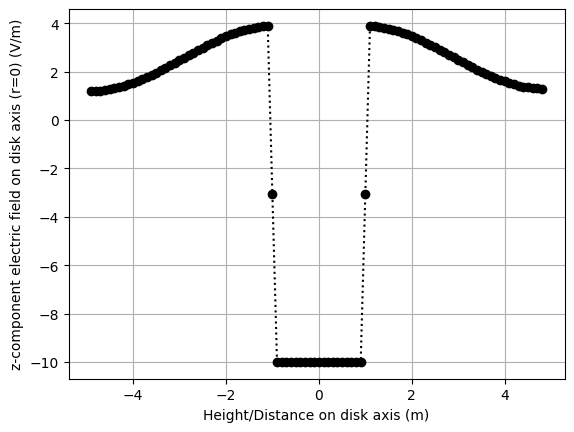

The z-component of the electric field norm at r=0 and z=0 is equal to -10.00 (V/m)
Ratio electric field at origin between 2 disks / electric field near center of 1 disk (question Q3.1) = 2.71


In [ ]:
"""================================
Answer model for Q4.1
"""

# answer: the electric field between the disk is determined by the spacing and the electric potential difference:
expected_E_between_disks = abs((V2-V1)/spacing_between_disks)
print('Norm of the expected electric field between the 2 disks = %1.2f' %expected_E_between_disks + ' V/m, field points in -z direction')
# Because E = - gradient(V), and V1>V2, we expect the electric field direction to be -z

Ez_on_axis = np.squeeze(Ez[:, 0])
plt.figure()
plt.plot(z_for_E, Ez_on_axis, ':ko')
plt.ylabel("z-component electric field on disk axis (r=0) (V/m)")
plt.xlabel("Height/Distance on disk axis (m)")
plt.grid(True)
plt.show()

Ez_disk_origin_2disks = np.squeeze(Ez[idx_z_zero,0])

# answer: the computed electric field on the axis of the two disks (r=0) between the two disks has nearly constant norm, and points in -z direction
print('The z-component of the electric field norm at r=0 and z=0 is equal to %1.2f'  %Ez_disk_origin_2disks + ' (V/m)')



ratio_E_two_disks_one_disk = abs(Ez_disk_origin_2disks/Ez_near_disk_on_axis)
print('Ratio electric field at origin between 2 disks / electric field near center of 1 disk (question Q3.1) = %1.2f' %ratio_E_two_disks_one_disk)
# answer: the electric field strength between the two disks (r=0,z=0) is larger than the electric field strength near the center of a single conducting disk

# answer: holding the two charged conducting disks next to each other enhances the electric field near the surface of the disks (between the two disks)


Q.4.2) Question for students:
- What is the expected surface charge density at the inner surfaces of the two disks?
- What is the expected total charge on each disk?
- What is the expected capacitance of the two disks?

In [ ]:
"""================================
Answer model for Q4.2
"""

# at the surface of a conductor, the electric field vector is : E = sigma/epsilon n (n is unit vector, normal at surface)
surface_charge_density_inner_surface = epsilon0 * Ez_disk_origin_2disks
print('Surface charge density on inner surface of disk hold at high electric potential = %1.2e' %(-surface_charge_density_inner_surface) + ' C/m^2')
print('Surface charge density on inner surface of disk hold at low electric potential = %1.2e' %(surface_charge_density_inner_surface) + ' C/m^2')

expected_total_charge = abs(surface_charge_density_inner_surface)*np.pi*disk_radius**2
print('The expected total charge on a disk is +/- %1.2e' %expected_total_charge + ' C')

# the capacitance equals to Q/(potential difference):
expected_capacitance = expected_total_charge/abs(V1-V2)
print('The expected capacitance is %1.2e' %expected_capacitance + ' F')


Surface charge density on inner surface of disk hold at high electric potential = 8.85e-11 C/m^2
Surface charge density on inner surface of disk hold at low electric potential = -8.85e-11 C/m^2
The expected total charge on a disk is +/- 1.00e-08 C
The expected capacitance is 5.01e-10 F


Q.4.3) Question for students:
- Is the surface charge density on the outer surfaces of the disks equal to zero? Explain your answer.
- What value takes the z-component of the electric field on the axis (r=0) near the inner surface and near the outer surface of each disk?
- What can you deduce about the surface charge density at r=0 on the inner and outer surfaces of the disks?
- What can you deduce about the true total charge compared to the expected total charge calculated in question Q4.2?
- Is the true capacitance larger or smaller than the expected capacitance calculed in question Q4.2? Explain your answer.
- Run again the Laplace solver of Part 4 with a smaller distance between the two conducting disks, what has changed?

The exact total charge, for various ratios of separation $s$ to plate radius $R$, is given in the image below.
- Calculate the true total charge calculated with the results of question Q4.3
- Is it in agreement with the exact total charge? Explain why.



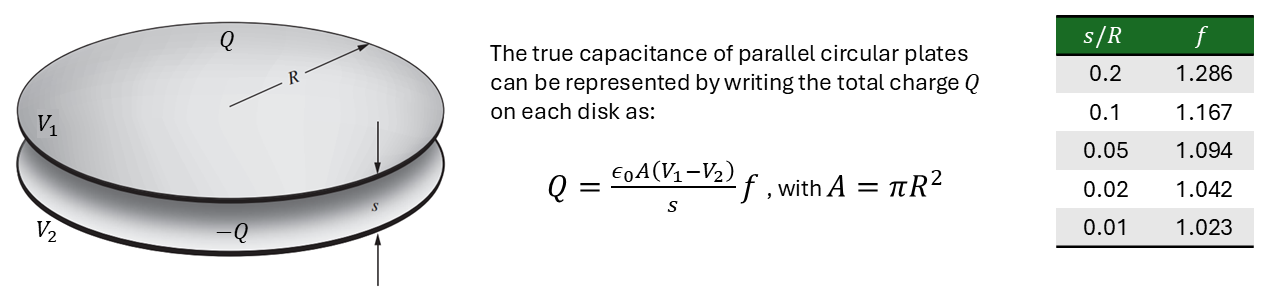

In [ ]:
display(Image("figures/charge_circular_plates_edge_effects.png"))

In [ ]:
"""================================
Answer model for Q4.3
"""

# answer: the surface charge density on the outer surface of the disk is not nul because the normal component of the electric field (Ez) is not nul

Ez_on_axis_outer_surface = np.squeeze(max(Ez[:, 0]))
Ez_on_axis_inner_surface = np.squeeze(min(Ez[:, 0]))
print('The z-component of the electric field on axis at outer surface of a disk = %1.2f' %Ez_on_axis_outer_surface + ' V/m')
print('The z-component of the electric field on axis at inner surface of a disk = %1.2f' %Ez_on_axis_inner_surface + ' V/m')

# answer: at the surface of a conductor, we have Ez=sigma/epsilon, thus the surface charge density is larger at inner side than at the outer side of the disks
print('The surface charge density at inner surface of a disk is %1.2f' %(abs(Ez_on_axis_inner_surface/Ez_on_axis_outer_surface)) + ' larger than that at the outer surface')

# answer: the true total charge is larger than the expected total charge calculated in question Q4.2, because outer surface of the disk also carries charges

# answer: the true capacitance is larger than the expected capacitance calculed in question Q4.2, because the true total charge is larger than the expected total charge calculated in question Q4.2

# answer: with a smaller distance between the disks, the field strength between the disks is larger and smaller near the outer surface of the disks

# answer: true total charge = charge on inner surface + charge on outer surface:
surface_charge_density_inner_surface = epsilon0 * abs(Ez_on_axis_inner_surface)
surface_charge_density_outer_surface = epsilon0 * abs(Ez_on_axis_outer_surface)
true_total_charge = (surface_charge_density_inner_surface+surface_charge_density_outer_surface)*np.pi*disk_radius**2
print('The true total charge (sum of charges on inner and outer disk surfaces) is %1.2e' %true_total_charge + ' C')

print('The expected total charge (ignoring contribution of the outer surface) is %1.2e' %expected_total_charge + ' C')
print('For a ratio s/R = %1.2f' %(spacing_between_disks/disk_radius) + ', we find a ratio true total charge / expected total charge = %1.2f' %(true_total_charge/expected_total_charge) )
# answer: the estimated true total charge underestimates the exact total charge,
# because the high charge concentration at the rim of the disks was not taken into account



The z-component of the electric field on axis at outer surface of a disk = 3.89 V/m
The z-component of the electric field on axis at inner surface of a disk = -10.00 V/m
The surface charge density at inner surface of a disk is 2.57 larger than that at the outer surface
The true total charge (sum of charges on inner and outer disk surfaces) is 1.39e-08 C
The expected total charge (ignoring contribution of the outer surface) is 1.00e-08 C
For a ratio s/R = 0.33, we find a ratio true total charge / expected total charge = 1.39


### 5) Design of a rain gauge

You will now work on the design a rain gauge to measure accumulated daily precipitation (in millimeters). The rain gauge will rely on the principle of an electric capacitor.

Background information: the highest one-day precipitation in the Netherlands never exceeded 150 mm.

Requirements:
- The rain gauge should be able to **measure accumulated daily precipitation from 1mm to 150mm**
- To be able to measure the capacitance accurately with a simple multimeter, **the capacitance should always be larger than 0.5 nF**
- The volume of the electric **capacitor must fit in a cubic volume with width 150mm**


Q.5.1) Question for students:

- What are the values and unit of the dielectric constant for water and air?

Answer model for Q5.1:

$\epsilon_r\approx 80$ for water and $\epsilon_r\approx 1$ for air (unitless)


Q.5.2) Question for students:

- Choose a simple capacitor geometry such that the accumulation of precipitation (water height increases) changes the capacitance.
- Draw the system.
- Indicate in your drawing the suitable dimensions/characteristics of the system.
- Indicate what materials should be used for the components of the system.
- Indicate in your drawing how you would connect the capacitor to the battery that maintains a constant electric potential difference ($\Delta V = V_1-V_2$) between the plates of the capacitor?
- Insert the image below.

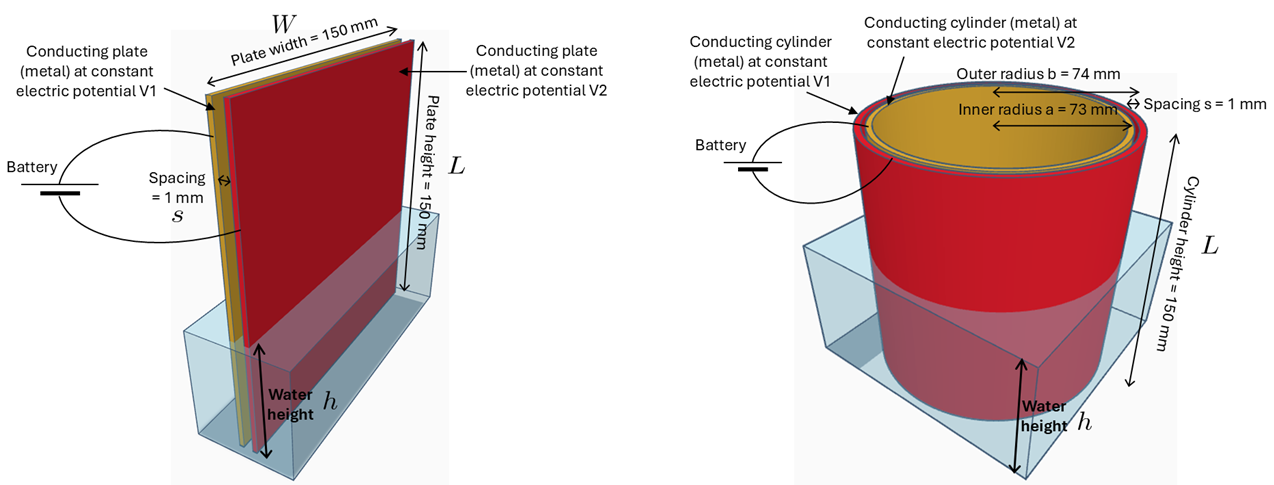

In [ ]:
"""================================
Answer model for Q5.2
"""

# Geometry choice : vertical parallel flat plates or vertical coaxial hollow cylinders
display(Image("figures/rain_gauge_geometry_2options.png"))

# Material choice : aluminium is a good conductor and affordable


Q.5.3) Question for students:
- Explain why changing the water height changes the capacitance if the electric potential difference in the capacitor is constant.
- Derive the analytical formula to describe relation between the capacitance and accumulated precipitation (water height). Explain the steps of your derivation.

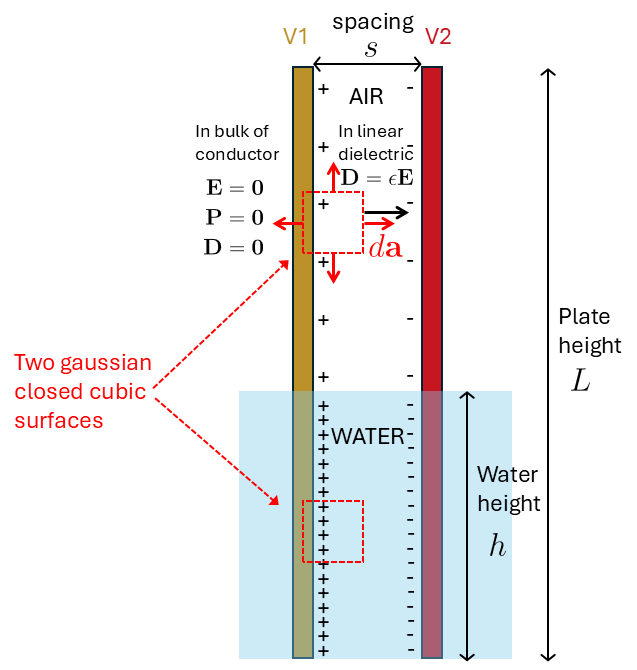

In [ ]:
display(Image("figures/principle_capacitive_rain_gauge.png"))

Answer model for Q5.3:

See Problem 4.19b in Griffiths' textbook.

With the capacitor placed vertically in a container, the rain will increase the water height in the container and within the spacing of the capacitor.

We apply Gauss’s law in integral form for the electric displacement on a closed cubic surface (see figure below), the left side is inside a conducting plate, the right side is in the spacing.

$\oint{ \mathbf{D} \cdot d\mathbf{a}}=Q_{\text{free}}^{\text{enclosed}}$

To solve this integral, 3 situations must be considered:
- In the bulk of an ideal conductor at electrostatic equilibrium, the electric field is null ($\mathbf{E} =\mathbf{0} $), thus the polarization is null ($\mathbf{P} =\mathbf{0} $). Therefore, the electric displacement is also null ($\mathbf{D} = \epsilon_0 \mathbf{E}+ \mathbf{P}= \mathbf{0} $).
- Air and water are considered linear media, thus: $\mathbf{D}=\epsilon \mathbf{E}$, the field between the plates is uniform and field vectors are horizontal. On the right vertical surface, we have $\mathbf{D} \cdot d\mathbf{a} = D~da$ because $\mathbf{D} \parallel d\mathbf{a}$
- For the horizontal sides of the cubic surface, $\mathbf{D} \cdot d\mathbf{a}=0$ because $\mathbf{D} \perp d\mathbf{a}$



Therefore, we find:

$\oint{ \mathbf{D} \cdot d\mathbf{a}}= \epsilon_{\text{ in spacing}}~ E_{\text{ in spacing}}~A$, where $A$ is the surface of one face of the cubic surface.

And we have:
$Q_{\text{free}}^{\text{enclosed}} = \sigma_{\text{free}}^{\text{on plate}}~A$

Finally, we obtain:
$\epsilon_{\text{ in spacing}}~ E_{\text{ in spacing}}=\sigma_{\text{free}}^{\text{on plate}}$

The electric field is the same in air and in water, because only determined by the potential difference and the distance between the plates.

Applying Gauss’s law in integral form for the electric displacement in the air and in the water, we obtain two equations:

$\sigma_{\text{free}}^{\text{plate contacting air}} = \epsilon_0\epsilon_r^{\text{air}}~ E_{\text{air}} \approx \epsilon_0\frac{\Delta V}{s}$

$\sigma_{\text{free}}^{\text{plate contacting water}} = \epsilon_0\epsilon_r^{\text{water}}~ E_{\text{water}} \approx 80~\epsilon_0\frac{\Delta V}{s}$

Therefore, the surface density of free charges on the plate surface is 80 times larger where the plate is in contact with water.

Therefore, the surface of the plate in contact with water will carry 80 times more free charges than the surface of the plate in contact with air.
This means that the total charge in the capacitor increases as the water height increases.
If the electric potential difference between the plates of the capacitor is constant (thanks to a battery), then the capacitance increases as the water height increases

Let's now calculate the expression of the capacitance $C=\frac{Q}{\Delta V}$.

The total charge $Q$ on one plate depends on the water height $h$:

$Q = W~h~ \sigma_{\text{free}}^{\text{plate contacting water}} + W~ (L-h)~ \sigma_{\text{free}}^{\text{plate contacting air}}$

$Q = W~h~ \epsilon_0~ \epsilon_r^{\text{water}}~ \frac{\Delta V}{s} + W~ (L-h)~ \epsilon_0~\epsilon_r^{\text{air}}~\frac{\Delta V}{s} = \frac{W~\epsilon_0~\Delta V}{s} \bigg(h~\epsilon_r^{\text{water}} + (L-h)~\epsilon_r^{\text{air}} \bigg) $

Assuming all free charges are located on the inner surfaces of the conducting plates, and taking $\epsilon_r^{\text{air}}=1$, the capacitance is given by:
$$C = \frac{Q}{\Delta V}= \frac{W\epsilon_0}{s}\bigg((\epsilon_r^{water}-1)h + L\bigg)$$

For two coaxial hollow cylinders with radius $a$ and $b$ (b>a), see Problems 2.44 and 4.28, the capacitance is given by:
$$C = \frac{2\pi\epsilon_0}{\ln{(b/a)}}\bigg((\epsilon_r^{water}-1)h + L\bigg)$$

Q.5.4) Question for students:

- How can you maximize the sensitivity of the rain gauge? (sensitivity in Faraday per mm)

(hint: calculate the derivative of the capacitance with respect to a relevant parameter)

- What physical and practical limitations limit the maximum sensitivity of the rain gauge?

Answer model for Q5.4:

The derivative of the capacitance with respect to the water height is:
$$\frac{\partial C}{\partial h} = \frac{W\epsilon_0}{s}\bigg(\epsilon_r^{water}-1\bigg)$$
The sensitivity of the rain gauge is maximized with the smallest spacing $s$ and the largest plate width $W$.

For two coaxial hollow cylinders with radius $a$ and $b$ (b>a), we have:
$$\frac{\partial C}{\partial h} = \frac{2\pi\epsilon_0}{\ln{(b/a)}}\bigg(\epsilon_r^{water}-1\bigg)$$
The sensitivity of the rain gauge is maximized with the smallest spacing $(b-a)$ so that $\ln{(b/a)}$ takes the smallest value and the largest cylinder radius $a$ (since $b/a = (b-a)/a+1$).

However, it is not possible to use a very large plate width (or very large cylinder radius) because:
- the system must fit in a 150mm-wide cubic volume (requirement of the design project)

And, it is not possible to use a very small spacing because:
- dielectric breakdown (if spacing is very small), ~3 kV/mm in air and rain water
- force created by capacitor, pushing water upward (effect increases with the electric field strength, either with large electric potential difference or small spacing)
- air/water surface tension if tiny spacing, which deforms the surface of the water (meniscus) and pulls water upward if clean metal surface

Q.5.5) Question for students:

- Write a python code that computes the capacitance of your system for given values of the relevant parameters.
- With the chosen design, calculate and plot the relation between capacitance and water height, using your python code (for accumulated precipitation from 1mm to 150mm).
- Verify if your system respect the design requirements.
- If not the case, modify your design, update your deliverable for questions Q5.2 to Q5.5, and explain how you modified your design to successfully fulfil the requirements.

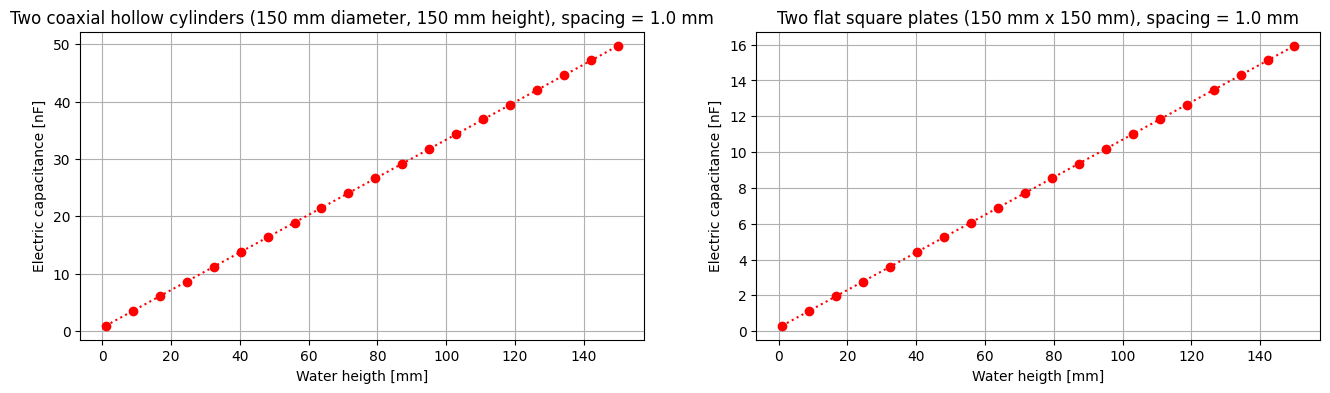

In [ ]:
"""================================
Answer model for Q5.5
"""

Eps_r_water = 80

h = np.linspace(1, 150, num=20)/1000 # (m) water height

# two coaxial hollow cylinders:
spacing_width = 0.001 # (m) spacing width between outer cylinder and inner cylinder
R_out = 0.075 # (m) radius outer cylinder
R_in = R_out-spacing_width # (m) radius inner cylinder
l = 0.15 # (m) capacitor height
C1 = 2*np.pi*epsilon0*((Eps_r_water-1)*h+l)/np.log(R_out/R_in) 

# two flat square plates:
w = 0.15 # (m) width of capacitor flat plate
#w = 0.15*np.sqrt(2) # (m) width of capacitor flat plate, diagonal
s = 0.001 # (m) spacing between flat plates
C2 = w/s*epsilon0*((Eps_r_water-1)*h+l) 



plt.figure(figsize=(16,4)) # Width, height in inches.
plt.subplot(1, 2, 1)
plt.plot(h*1000 , C1*1e9, ':ro' )
plt.xlabel('Water heigth [mm]')
plt.ylabel('Electric capacitance [nF]')
plt.title('Two coaxial hollow cylinders (150 mm diameter, 150 mm height), spacing = %1.1f' %(spacing_width*1000) + ' mm')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(h*1000 , C2*1e9, ':ro' )
plt.xlabel('Water heigth [mm]')
plt.ylabel('Electric capacitance [nF]')
plt.title('Two flat square plates (150 mm x 150 mm), spacing = %1.1f' %(s*1000) + ' mm')
plt.grid()
plt.show()

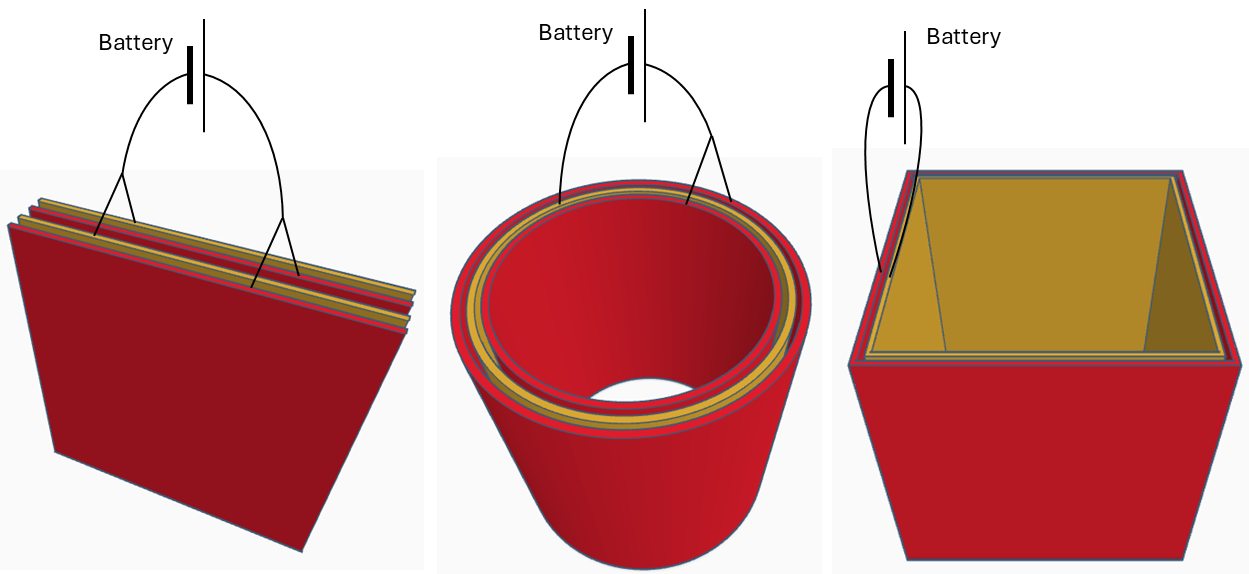

In [ ]:
# 3 options to increase the capacitance

display(Image("figures/3options_to_increase_capacitance.png"))

# With two concentric squared closed surfaces, the total capacitance is 4 times the capacitance of one pair of parallel plates
# With N parallel plates with equal area, the total capacitance is (N-1) the capacitance of one pair of plates
# With N coaxial tubes with different radii, the total capacitance is the sum of the capacitance of each pair of consecutive tubes


Q.5.6) Question for students:

The real system will not exactly behave according to the theoretical relation between capacitance and accumulated precipitation. One of the causes may be the force on the water (caused by the electric field) that pushes water upward in the spacing of the capacitor.
- To what height does the water rise in the spacing? (see chapter 4.4.4 in Griffiths)
- Write a python to calculate it
- How can you minimize this effect?

There may be other causes of bias. For instance, the electrostatic edge effects which increase the capacitance (see question Q3.2, Q3.3 and Q4.3). Also, adhesion (water-solid attraction) and cohesion (water–water attraction) pull water up along the vertical surface of the plates, and surface tension determines the shape of the air/water interface (meniscus). That effect might significantly increase water height in the spacing if very narrow (capillary force).
- Without modeling the effects of these other possible causes of bias, how could you still obtain an accurate measurement with the rain gauge? Explain your proposition.

Answer model for Q5.6:

Following chapter 4.4.4 in Griffiths' textbook, the upward force on water is:
$F = \frac{1}{2}V^2\frac{\partial C}{\partial h} = \frac{1}{2}V^2\frac{W\epsilon_0}{s}\bigg(\epsilon_r^{water}-1\bigg) $

The gravitational downward force on water is: $F = mg = \rho g s W h$

At equilibrium, both forces are equal, thus:
$\frac{1}{2}V^2\frac{W\epsilon_0}{s}\bigg(\epsilon_r^{water}-1\bigg) = \rho g s W h$

Finally, we find the water height increase:
$ h = \frac{1}{2}V^2\frac{\epsilon_0}{\rho g s^2}\bigg(\epsilon_r^{water}-1\bigg) $

The effect can be minimized by using a rather low voltage, for instance 10-20V.

The system could be calibrated. The calibration procedure would consist in measuring the exact relation between the water height and the capacitance.

In [ ]:
# For parallel plate capacitor (see chapter 4.4.4)

V = 20 # (V)
Chi_e = 79 # = (epsilon_r - 1)
rho = 1000 # (kg/m^3)
s = 0.001 # (m)
g = 9.81 # (m/s^2)
h = epsilon0*V**2*Chi_e / (2*rho* g * s**2) # (m)
print('water height increase for parallel plate cappacitor = %1.1e' %(h*1000) +' mm')

# For cylindrical capacitor (see Problem 4.28)

V = 20 # (V)
Chi_e = 79
rho = 1000 # (kg/m^3)
b = 0.074 # (m)
a = 0.073 # (m)
g = 9.81 # (m/s^2)
h = epsilon0*Chi_e*V**2/(rho*(b**2-a**2)*g*np.log(b/a)) # (m)
print('water height increase for coaxial cylinder cappacitor = %1.1e' %(h*1000) +' mm')


water height increase for parallel plate cappacitor = 1.4e-02 mm
water height increase for coaxial cylinder cappacitor = 1.4e-02 mm


Q.5.7) Question for students:

The electrical conductivity of rainwater is small but not null.
- How can you improve the design to avoid free electrical charges flowing between the plates of the capacitor?
- Explain your solution and include a drawing of the improved design.
- If modified, give the new relation between the capacitance and the water height.
- Verify that your modified design respects the requirements. 

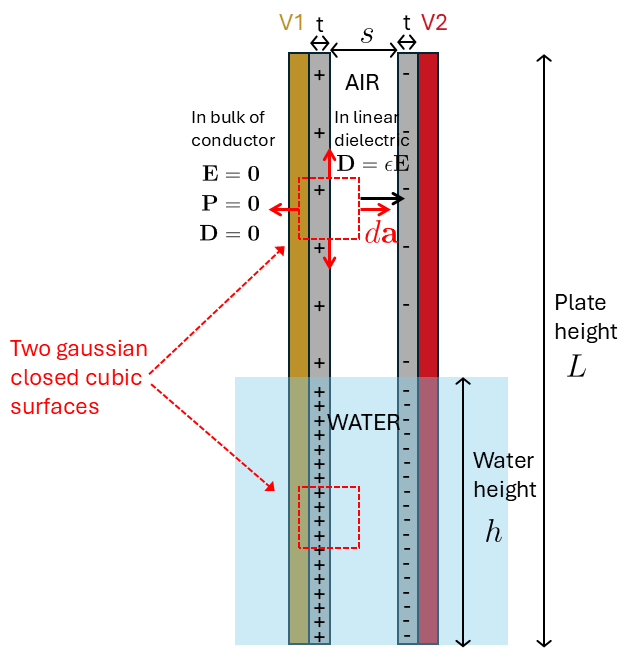

In [ ]:
display(Image("figures/capacitor_with_insulating_layers.png"))

Answer model for Q5.7:

The inner and outer conductors could be coated with a thin insulator (plastic slab, coating or paint with thickness $t$) so that the water does not conduct current. The water should not directly contact either conductor. However, the presence of a thick insulator (thick compared to the air gap) would affect the calculation of the capacitance (see Problems 4.18 and 4.19 in Griffiths 5th edition).

Let's now calculate the modified relationship between capacitance and water height.

Applying the same method as in Q5.3, we find: $E_{\text{in plastic}} = \frac{\sigma_{free}^{capacitor~plate}}{\epsilon_{\text{plastic}}}$

The electric potential difference is: $V^{(+)} - V^{(-)} = -\int_{(-)}^{(+)}\mathbf{E}\cdot d\mathbf{l} = E_{\text{in plastic}} ~t + E_{\text{in water/air}} ~s + E_{\text{in plastic}} ~t$

Thus $V^{(+)} - V^{(-)} = 2t \frac{\sigma_{free}^{capacitor~plate}}{\epsilon_{\text{plastic}}} + s \frac{\sigma_{free}^{capacitor~plate}}{\epsilon_{\text{water/air}}} = \frac{\sigma_{free}^{capacitor~plate}}{\epsilon_0} \bigg( \frac{2t}{\epsilon_r^{plastic}} + \frac{s}{\epsilon_r^{water/air}} \bigg)$

The total charge in the capacitor is $Q = Q_{water} + Q_{air} = W \epsilon_0 \Delta V \bigg( \frac{h}{ \frac{2t}{\epsilon_r^{plastic}} + \frac{s}{\epsilon_r^{water}} } + \frac{L-h}{ \frac{2t}{\epsilon_r^{plastic}} + \frac{s}{\epsilon_r^{air}} } \bigg)$

The capacitance is thus: $C = \frac{Q}{\Delta V} = W \epsilon_0 \bigg( \frac{h}{ \frac{2t}{\epsilon_r^{plastic}} + \frac{s}{\epsilon_r^{water}} } + \frac{L-h}{ \frac{2t}{\epsilon_r^{plastic}} + \frac{s}{\epsilon_r^{air}} } \bigg)$

For PVC slab, acrylic insulating paint or epoxy coating, $\epsilon_r^{plastic} \approx 3.5$.

The capacitance is decreased by the insulator, therefore you can increase the number of parallel plates to have a capacitance of at least 0.5nF for a water height of 1mm.


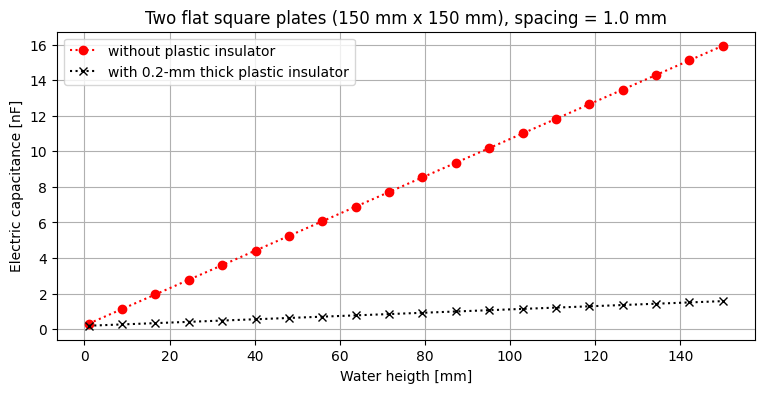

In [ ]:
"""================================
Answer model for Q5.7
"""

# with Eps_r_air = 1
Eps_r_water = 80
h = np.linspace(1, 150, num=20)/1000 # (m) water height

s = 0.001 # (m) spacing between flat plates
w = 0.15 # (m) width of capacitor flat plate
# two flat square plates without thin insulator:
C0 = w/s*epsilon0*((Eps_r_water-1)*h+l)
# two flat square plates with 0.5mm thin insulator:
Eps_r_plastic = 3.5
t = 0.0002 # (m) thickness of insulator
C = w*epsilon0*(h/(2*t/Eps_r_plastic + s/Eps_r_water) + (l-h)/(2*t/Eps_r_plastic + s))

plt.figure(figsize=(9,4)) # Width, height in inches.
plt.plot(h*1000 , C0*1e9, ':ro' )
plt.plot(h*1000 , C*1e9, ':kx' )
plt.legend(['without plastic insulator','with %1.1f-mm thick plastic insulator' %(t*1000)])
plt.xlabel('Water heigth [mm]')
plt.ylabel('Electric capacitance [nF]')
plt.title('Two flat square plates (150 mm x 150 mm), spacing = %1.1f' %(s*1000) + ' mm')
plt.grid()
plt.show()

In [ ]:
# Remark:
# The effect of capillary action is significant for a spacing of 1-10 mm.
# But a calibration should enable an accurate measurement of water height.

gamma = 0.072 # (N/m)
rho = 1000 # (kg/m^3)
s = 0.001 # (m)
g = 9.81 # (m/s^2)
#contact_angle_deg = 30 # for clean metal-water
contact_angle_deg = 75 # for clean PVC-water
h = 2*gamma*np.cos(contact_angle_deg*np.pi/180)/ (rho* g * s) # (m)
print('For a spacing of %1.2f ' %(s*1000) +' mm, the water height increase by capillary action for parallel plate capacitor = %1.2f' %(h*1000) +' mm')

For a spacing of 1.00  mm, the water height increase by capillary action for parallel plate capacitor = 3.80 mm
